## Chapter 5
# Detection Using Cross Correlation With Whistler Kernel

In [1]:
import os, sys
import numpy as np
from math import floor
from matplotlib import pyplot as plt
from tqdm import tqdm
import h5py
from scipy import signal
# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))
from sample import Sample
from dataset import Dataset
from database import Database
from cfar_detector import CFARDetector
from dataset_simulation import DatasetSimulation

dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
database = Database(dataset_loc, database_loc, site)

linewidth = 2
font_title = 32
font_legend = 20
font_label = 24
font_ticks = 18
font = [font_title, font_legend, font_label, font_ticks, linewidth] # [None]*5

2013-07-07UT14:48:18.20771914.marion.vr2


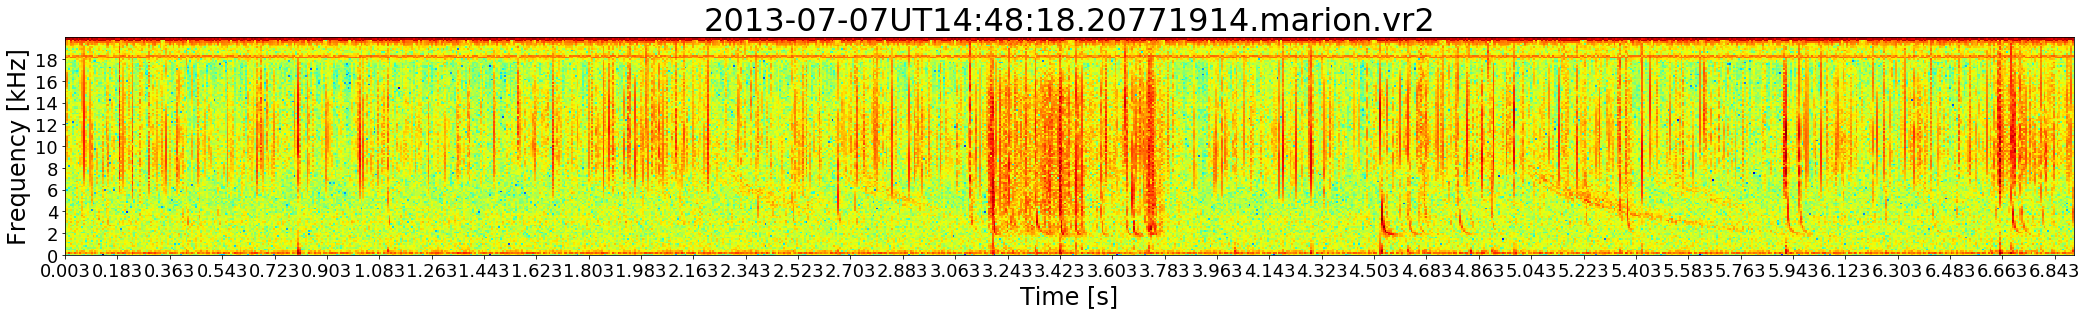

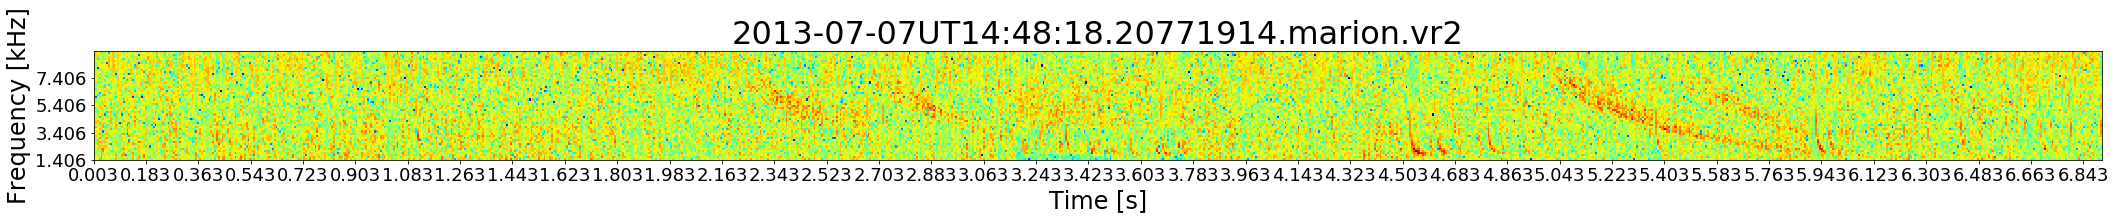

(array([[ 2.4, 31. ],
       [ 2.9, 33. ],
       [ 5.2, 78. ],
       [ 5.3, 85. ]]), array([[375,  31],
       [453,  33],
       [812,  78],
       [828,  85]]))


(array([[  8,  52, 344, 500],
        [  8,  52, 422, 578],
        [  8,  52, 781, 937],
        [  8,  52, 797, 953],
        [  8,  52,   0, 156],
        [  8,  52, 156, 312]]), 4, 6)

In [2]:
file = np.random.choice(database.get_train(),1)[0]
file = '2013-04-22UT01:28:03.48279656.marion.vr2'
file = '2013-07-07UT14:48:18.20771914.marion.vr2'
print(file)
sample = CFARDetector(dataset_loc, site, file)
freq_size = 4
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
transforms = ['slice', 'zscore']
transforms_params = [[1.5,9.5], ['None']]
sample.spectrogram_with_axis(log10=True)
sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True,ticks=[0.18,2], title=sample.get_file(), cmap='jet', cmap_show=False, font=font)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size/2)
figsize = sample.get_figsize()
sample.apply_transform(transforms, transforms_params)
sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True,ticks=[0.18,2],
                           title=sample.get_file(), cmap='jet', cmap_show=False, font=font)
print(sample.awda_whistlers(time_err=1))
sample.cuts(cut_time=1, cut_time_split=0.2, cut_freq=8, cut_freq_min=1.5, time_err=1, noise=True)

In [26]:
sample.awda_whistlers(time_err=0.1)

(array([[ 2.5, 54. ],
        [ 2.9, 76. ],
        [ 3. , 77. ]]), array([[390,  54],
        [453,  76],
        [469,  77]]))

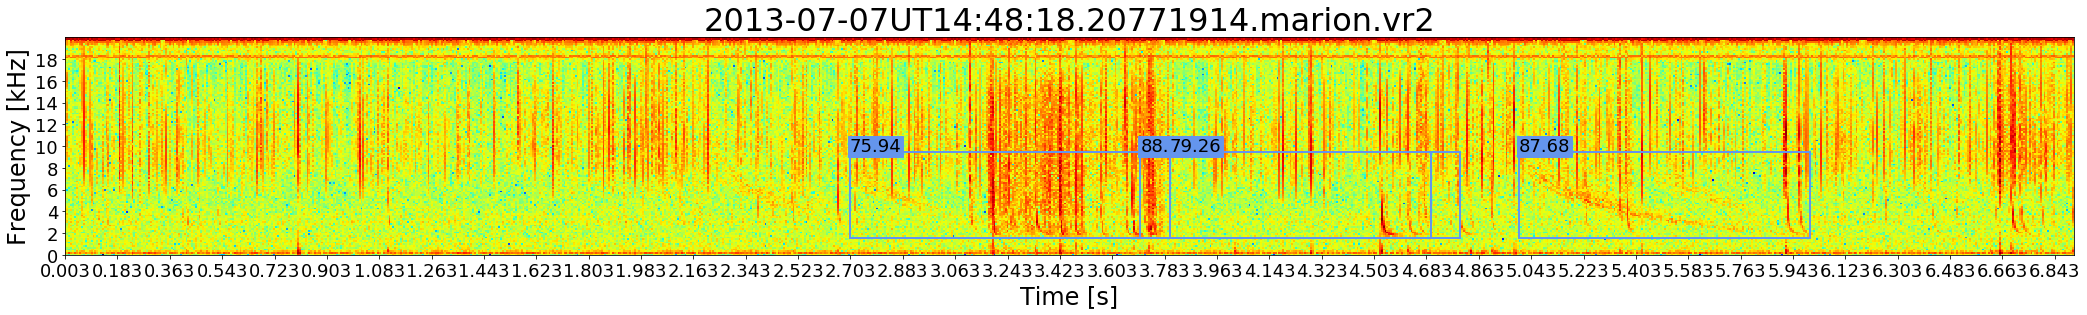

[[ 2.7    3.7    1.5    9.5   75.944]
 [ 3.7    4.7    1.5    9.5   88.604]
 [ 3.8    4.8    1.5    9.5   79.256]
 [ 5.     6.     1.5    9.5   87.684]]


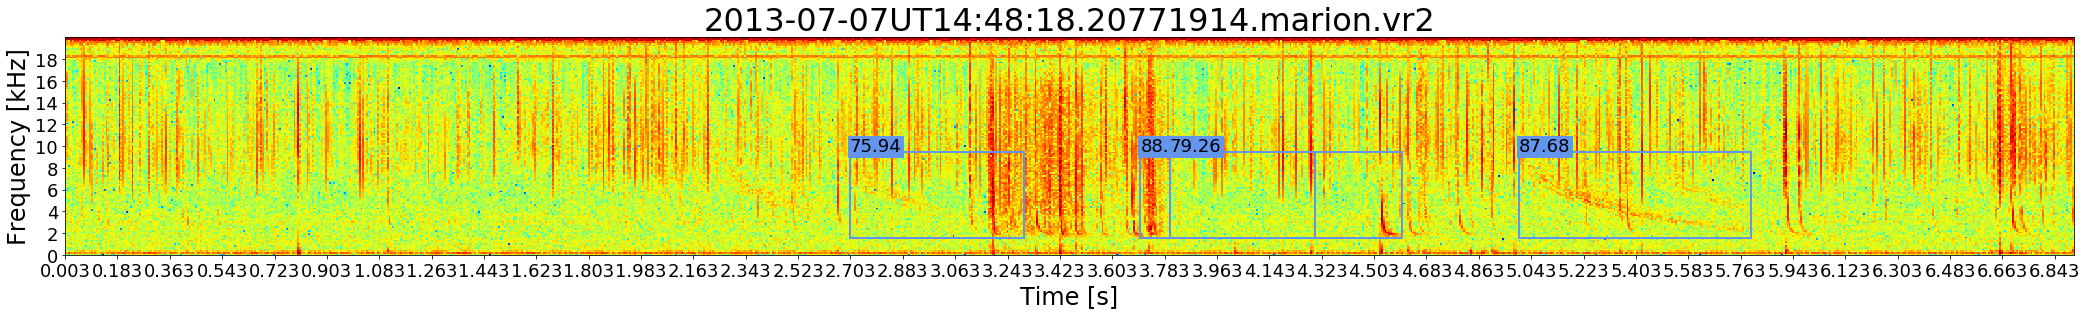

[[ 2.7    3.3    1.5    9.5   75.944]
 [ 3.7    4.3    1.5    9.5   88.604]
 [ 3.8    4.6    1.5    9.5   79.256]
 [ 5.     5.8    1.5    9.5   87.684]]


In [3]:
N, G = 10 , 7
X_dB = 5
pfa = (1/(1+(10**(X_dB/10))/(2*N)))**(2*N)
pfa = 4.103e-03
k = N-1
TS,TL = floor(N/3), N

kernel = sample.load_kernel('sim', [0.35,80,1])
# sample.plot_corr_output(transforms, transforms_params, 'ca_cfar', [N,G,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='CA CFAR',font=font)
# sample.plot_corr_output(transforms, transforms_params, 'os_cfar', [N,G,k,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='OS CFAR',font=font)
# sample.plot_corr_output(transforms, transforms_params, 'tm_cfar', [N,G,TS,TL,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='TM CFAR',font=font)
# sample.plot_detection_pulse(transforms, transforms_params, 'fusion_cfar', [N,G,k,TS,TL,pfa], kernel=kernel, figsize=(figsize[0],2), title='LF CFAR',font=font)
output = sample.detection_starting_locations(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,TS,TL,pfa])

bbox = sample.detection_bounding_boxes(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,TS,TL,pfa], threshold=73, time_error=1,duration=False)
sample.spectrogram_with_axis(log10=True)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True,ticks=[0.18,2], title=sample.get_file(), cmap='jet', cmap_show=False, 
                        font=font,output=bbox)
print(bbox)
bbox = sample.detection_bounding_boxes(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,TS,TL,pfa], threshold=73, time_error=1,duration=True)
sample.spectrogram_with_axis(log10=True)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True,ticks=[0.18,2], title=sample.get_file(), cmap='jet', cmap_show=False, 
                        font=font,output=bbox)
print(bbox)

2013-07-29UT02:52:11.93571922.marion.vr2
X_dB = 10.000, Pfa=4.103e-03, Pd= 4.111e-01


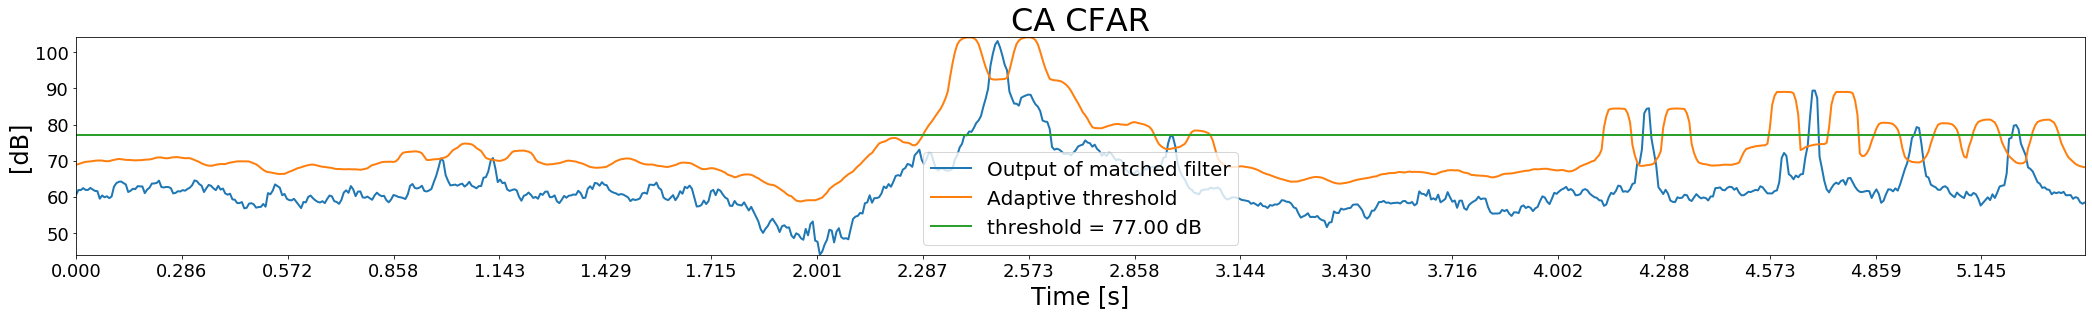

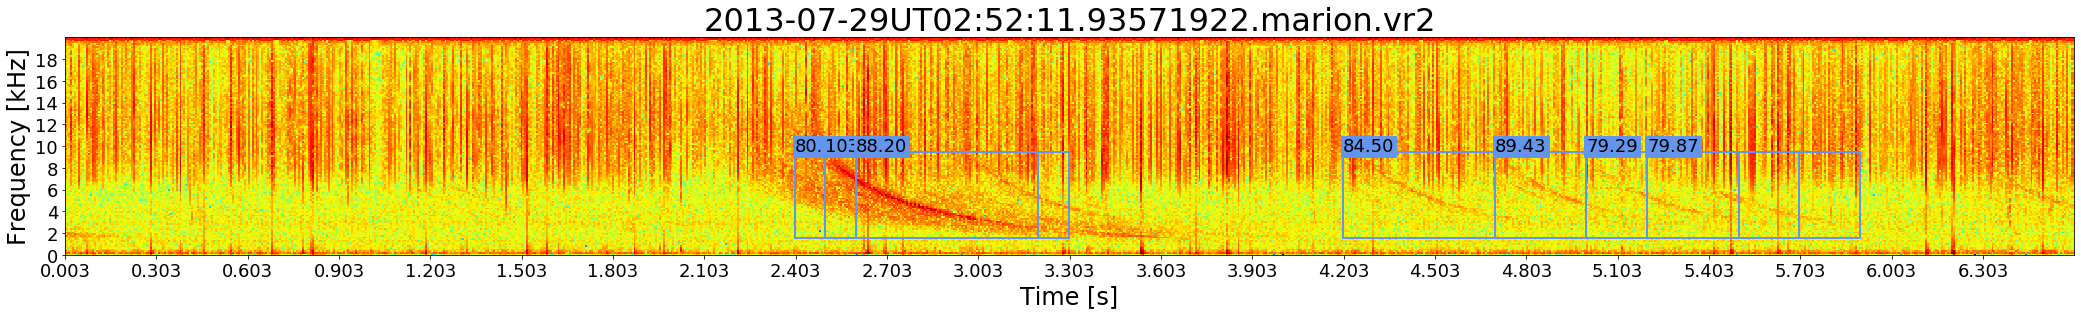

[[0.   0.2 ]
 [0.2  0.4 ]
 [0.4  0.59]
 [0.59 0.79]
 [0.79 0.99]
 [0.99 1.19]
 [1.19 1.39]
 [1.39 1.59]
 [1.59 1.78]
 [1.78 1.98]
 [6.4  6.6 ]] [[2.1  2.3 ]
 [2.2  2.4 ]
 [2.3  2.5 ]
 [2.41 2.6 ]
 [2.9  3.1 ]
 [4.2  4.4 ]
 [4.6  4.8 ]
 [5.2  5.4 ]
 [6.2  6.4 ]]


In [11]:
file = np.random.choice(database.get_train(),1)[0]
# file = '2013-07-26UT01:21:37.31171914.marion.vr2' # perfect perfect
# file = '2013-01-27UT01:02:20.38947602.marion.vr2' # perfect cfar example
# file = '2013-07-29UT02:52:11.93571922.marion.vr2'

# file = '2013-07-23UT17:43:48.20451906.marion.vr2'
# file = '2013-07-05UT19:09:09.53571914.marion.vr2'
# file = '2013-07-04UT18:57:16.16611930.marion.vr2'

# thick
# file = '2013-07-29UT13:35:32.63971914.marion.vr2'
# file = '2013-07-30UT22:42:37.67651922.marion.vr2'
# file = '2013-07-29UT14:10:55.64771914.marion.vr2'
# file = '2013-07-02UT16:02:40.59491914.marion.vr2'
# file ='2013-07-10UT19:35:10.41891938.marion.vr2'
# file = '2013-07-31UT01:35:22.19491914.marion.vr2'
# file = '2013-06-28UT01:05:06.84771922.marion.vr2'
print(file)
sample = CFARDetector(dataset_loc, site, file)
freq_size = 4
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
figsize=sample.get_figsize()
sample.spectrogram_with_axis(log10=True)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size/2)
transforms = ['slice', 'zscore']
transforms_params = [[1.5,9.5], ['None']]
sample.apply_transform(transforms, transforms_params)
N, G = 10 , 7
X_dB = 10
pfa = (1/(1+(10**(X_dB/10))/(2*N)))**(2*N)
ca = 2*N*(pfa**(-1/(2*N))-1)
pd = (1+((ca/(2*N))/(1+X_dB)))**(-2*N)
k = N-1
pfa = 4.103e-03
TS,TL = floor(N/3), N
print('X_dB = %.3f, Pfa=%.3e, Pd= %.3e'%(X_dB, pfa, pd))
kernel = sample.load_kernel('sim', [0.35,80,1])
sample.plot_corr_output(transforms, transforms_params, 'ca_cfar', [N,G,pfa], kernel=kernel, thresholds=[67+10],#[63+10*np.log10(2*N*(pfa**(-1/(2*N))-1))], 
                        detection=True, figsize=(figsize[0],4), title='CA CFAR',font=font)
# sample.plot_corr_output(transforms, transforms_params, 'os_cfar', [N,G,k,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='OS CFAR',font=font)
# sample.plot_corr_output(transforms, transforms_params, 'tm_cfar', [N,G,TS,TL,pfa], kernel=kernel, detection=True, figsize=(figsize[0],4), title='TM CFAR',font=font)
# sample.plot_detection_pulse(transforms, transforms_params, 'fusion_cfar', [N,G,k,TS,TL,pfa], kernel=kernel, figsize=(figsize[0],2), title='LF CFAR',font=font)
output = sample.detection_starting_locations(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,TS,TL,pfa])
# print(output)
bboxes = sample.detection_bounding_boxes(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,TS,TL,pfa], threshold=67+10, time_error=1, duration=True)
# print(bboxes)
sample.spectrogram_with_axis(log10=True)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True,ticks=[0.3,2], title=sample.get_file(), cmap='jet', cmap_show=False, 
                        font=font,output=bboxes)
cuts, w, n = sample.cuts(cut_time=0.2, cut_time_split=1.5, cut_freq=8, cut_freq_min=1.5, time_err=1, noise=True)
freq = lambda y: round(y*sample.get_freq_res(),2)
time = lambda x: round(x*sample.get_time_res(),2)
cuts = np.array([[freq(c[0]),freq(c[1]),time(c[2]),time(c[3])] for c in cuts])
# print(cuts[w:],n,w)
noise = np.array([[c[2],c[3]] for c in cuts[w:]])
target = np.array([[c[2],c[3]] for c in cuts[:w]])
print(noise, target)
# sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size/2)
# transforms = ['slice', 'zscore']
# transforms_params = [[1.5,9.5], ['None']]
# sample.apply_transform(transforms, transforms_params)
# sample.spectrogram_plot(figsize=sample.get_figsize(), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
#                            xaxis=True, yaxis=True,ticks=[0.18,2],
#                            title=sample.get_file(), cmap='jet', cmap_show=False, font=font)